# Bike Rental Predictions
Data pertaining to number of bike rentals per day/hour was collected by Washington D.C. This data will be used to train three machine learning models to predict the number of bike rentals in a day/hour. The predictions generated from these machine learning models will be compared to the actual number of bike rentals in a day/hour to determine the error metric associated with each model. The error metrics can then be compared between models to determine the best model to use to predict bike rentals in a given day/hour. 

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in the bike rentals data into a dataframe 
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

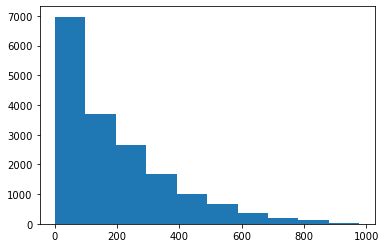

In [3]:
#Plot a histogram to show the distribution of the cnt column, 
#or total number of rentals in a given hour
plt.hist(bike_rentals['cnt'])

In [4]:
#Determine feature correlations to the target column, cnt
correl = bike_rentals.corr()['cnt'].sort_values(ascending=False)
correl

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [5]:
#Create a function that groups tha hours of the day a rental 
#occurred into morning (1), afternoon (2), evening (3), and night (4).
def assign_label(hour):
    if (hour>=6)&(hour<12):
        return 1
    if (hour>=12)&(hour<18):
        return 2
    if (hour>=18)&(hour<24):
        return 3
    if (hour>=0)&(hour<6):
        return 4
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [6]:
#Check data types and check for null values
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
 17  time_label  17379 non-null  int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 2.4+ MB


In [7]:
#Split the data into 80/20 train/test sets
split_80 = int(np.round(0.8*bike_rentals.shape[0]))
train = bike_rentals.sample(frac=0.8, random_state=1)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
print('train shape: ', train.shape, '\n','test shape: ', test.shape)

train shape:  (13903, 18) 
 test shape:  (3476, 18)


In [8]:
#Drop dteday (object dtype), casual and registered (related to target column), 
#and cnt (target) columns
columns = bike_rentals.columns.drop(['dteday','casual','registered','cnt'])
columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'time_label'],
      dtype='object')

In [9]:
#Import linear regression machine learning model and error metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
#Instantiate a linear regression model and train on train data set
lr = LinearRegression()
lr.fit(train[columns],train['cnt'])

#Use linear regression model to make train data set 
#target column (cnt) predictions 
prediction_lr_train = lr.predict(train[columns])

#Calculate error metrics of the predictions versus the 
#actual values in the train cnt column
rmse = np.sqrt(mean_squared_error(train['cnt'],prediction_lr_train))
mae = mean_absolute_error(train['cnt'],prediction_lr_train)
print('train rmse: ', rmse, '\n', 'train mae: ', mae)

train rmse:  132.60749383362054 
 train mae:  99.68285632645474


In [11]:
#Use linear regression model to make test data set 
#target column (cnt) predictions 
prediction_lr_test = lr.predict(test[columns])

#Calculate error metrics of the predictions versus the 
#actual values in the test cnt column
rmse = np.sqrt(mean_squared_error(test['cnt'],prediction_lr_test))
mae = mean_absolute_error(test['cnt'],prediction_lr_test)
print('test rmse: ', rmse, '\n', 'test mae: ', mae)

test rmse:  130.5837848710458 
 test mae:  98.4264883094502


In [12]:
#Import decision tree machine learning model
from sklearn.tree import DecisionTreeRegressor

#Instantiate a decision tree model and train on train data set
dtr = DecisionTreeRegressor(min_samples_leaf=8, max_depth=6)
dtr.fit(train[columns],train['cnt'])

#Calculate error metrics of the predictions versus the 
#actual values in the train cnt column
prediction_dtr_train = dtr.predict(train[columns])
rmse = np.sqrt(mean_squared_error(train['cnt'],prediction_dtr_train))
mae = mean_absolute_error(train['cnt'],prediction_dtr_train)
print('train rmse: ', rmse, '\n', 'train mae: ', mae)

train rmse:  101.13400190912888 
 train mae:  64.63440640460556


In [13]:
#Use decision tree model to make test data set 
#target column (cnt) predictions 
prediction_dtr_test = dtr.predict(test[columns])

#Calculate error metrics of the predictions versus the 
#actual values in the test cnt column
rmse = np.sqrt(mean_squared_error(test['cnt'],prediction_dtr_test))
mae = mean_absolute_error(test['cnt'],prediction_dtr_test)
print('test rmse: ', rmse, '\n', 'test mae: ', mae)

test rmse:  102.3007234340344 
 test mae:  65.97572767880484


In [14]:
#Import random forest machine learning model
from sklearn.ensemble import RandomForestRegressor

#Instantiate a random forest model and train on train data set
rfr = RandomForestRegressor(n_estimators=200, min_samples_leaf=8, max_depth=6)
rfr.fit(train[columns],train['cnt'])

#Use random forest model to make test data set 
#target column (cnt) predictions 
prediction_rfr_train = rfr.predict(train[columns])

#Calculate error metrics of the predictions versus the 
#actual values in the train cnt column
rmse = np.sqrt(mean_squared_error(train['cnt'],prediction_rfr_train))
mae = mean_absolute_error(train['cnt'],prediction_rfr_train)
print('train rmse: ', rmse, '\n', 'train mae: ', mae)

train rmse:  95.93951287957691 
 train mae:  61.33312127168961


In [15]:
#Use random forest model to make test data set 
#target column (cnt) predictions 
prediction_rfr_test = rfr.predict(test[columns])

#Calculate error metrics of the predictions versus the 
#actual values in the test cnt column
rmse = np.sqrt(mean_squared_error(test['cnt'],prediction_rfr_test))
mae = mean_absolute_error(test['cnt'],prediction_rfr_test)
print('test rmse: ', rmse, '\n', 'test mae: ', mae)

test rmse:  97.43410882626239 
 test mae:  62.61585415760033


## Conclusion
Three different models (Linear Regression, Decision Tree, and Random Forest) were trained on the bike rentals data set to determine which performs the best and produces the lowest amount of error while also avoiding an overfit model where the error is much less on the train data set than on the test data set. The random forest model edged out the decision tree model but both had significant increases in predictive performance over the linear regression model. All models were tweaked to have relatively low overfitting. 